## 2. Data Exploration and Preprocessing
#### **Task 1:** Data Exploration

Notebook: notebooks/EDA.ipynb
Steps:
- Load the dataset.
- Explore the data structure, types, and summary statistics.
- Visualize relationships between features and the target variable.
- Identify missing values and outliers.

In [7]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Load dataset
file_path =(r"D:\Assignment\Machine Lerning\machine-learning-introduction-Sabuna-Gamal\Data\BostonHousing.csv")
df = pd.read_csv(file_path)

# Display the first few rows
df.head(10)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [14]:
# Check the structure of the dataset
df.info()

# Get summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values


rm    5
dtype: int64

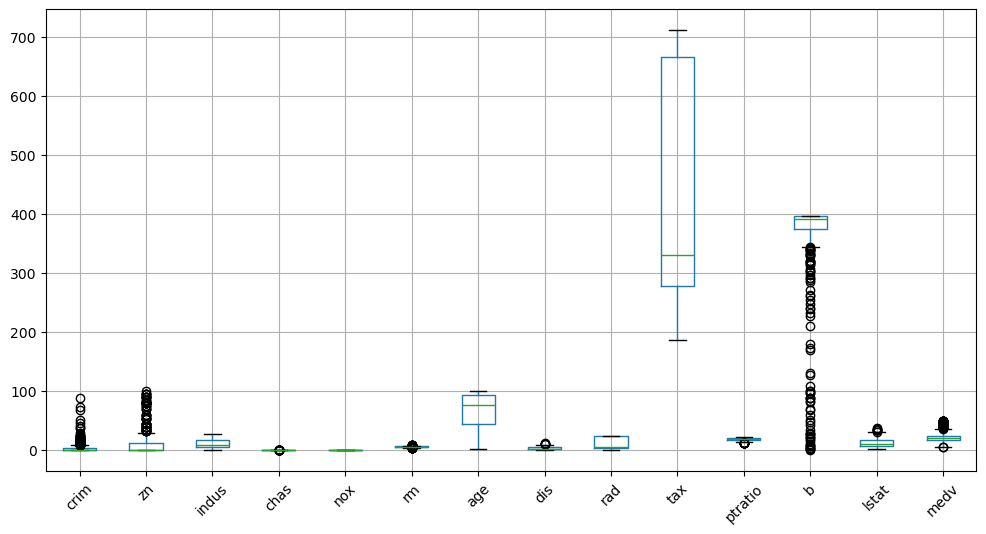

In [18]:
# Box plot for detecting outliers
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)  # Rotate labels for better visibility
plt.show()


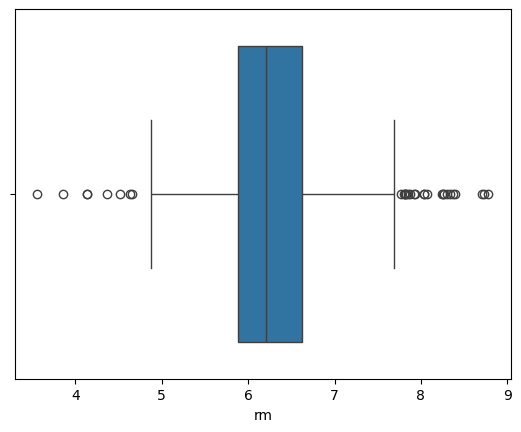

In [25]:
# Box plot for a specific feature (e.g., 'RM' - Average number of rooms per house)
sns.boxplot(x=df['rm'])
plt.show()

In [27]:
# Remove outliers in rm feature (keeping values within 1.5*IQR range)
Q1 = df['rm'].quantile(0.25)
Q3 = df['rm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['rm'] >= lower_bound) & (df['rm'] <= upper_bound)]

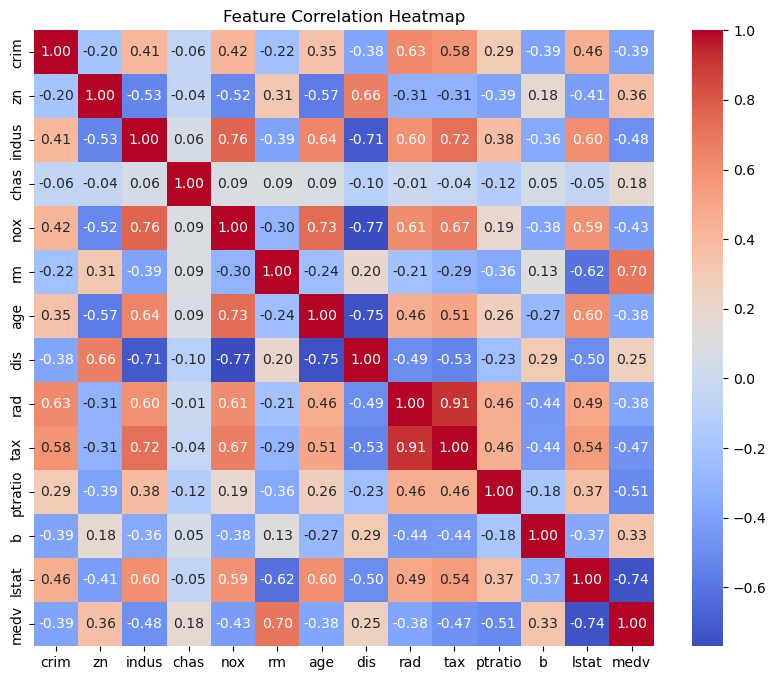

In [28]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


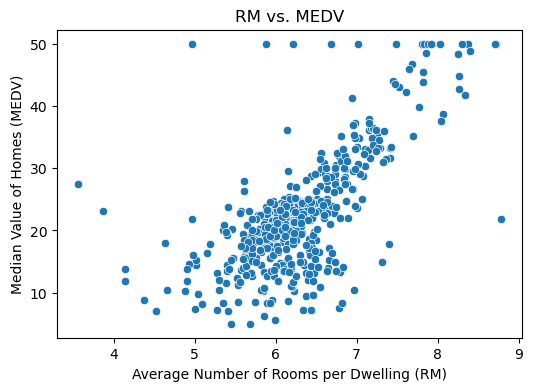

In [29]:
# Scatter plot between RM (rooms per dwelling) and MEDV (house price)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['rm'], y=df['medv'])
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.title("RM vs. MEDV")
plt.show()


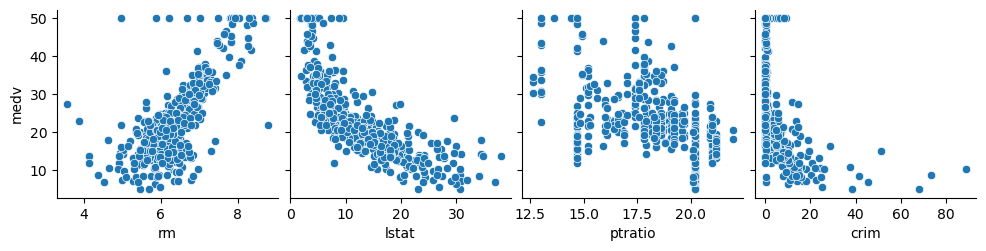

In [31]:

# Selecting important features and target variable
features = ["rm", "lstat", "ptratio", "crim"]  # Modify as needed
df_selected = df[features + ["medv"]]

# Pairplot to visualize relationships
sns.pairplot(df_selected, x_vars=features, y_vars=["medv"], kind="scatter", diag_kind=None)
plt.show()